
This is a digital architecture based on the paper "A 95.6-TOPS/W Deep Learning Inference
Accelerator With Per-Vector Scaled 4-bit Quantization in 5 nm" created by Simon Opsahl, 
Christina Crow, and Carlos Villa. 

Some of the important variables for scc_proj_2025:

- *TECHNOLOGY*: 5nm nm
- *SUPPORTED_INPUT_BITS*: 8 bit(s)
- *SUPPORTED_OUTPUT_BITS*: 16 bit(s)
- *SUPPORTED_WEIGHT_BITS*: 8 bit(s)
- *GLOBAL_CYCLE_SECONDS*: 1.1e-09 clock period

Components are defined the following places:
- workspace/models/arch/1_macro/scc_proj_2025/example_components/components.csv
- workspace/models/arch/1_macro/scc_proj_2025/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!



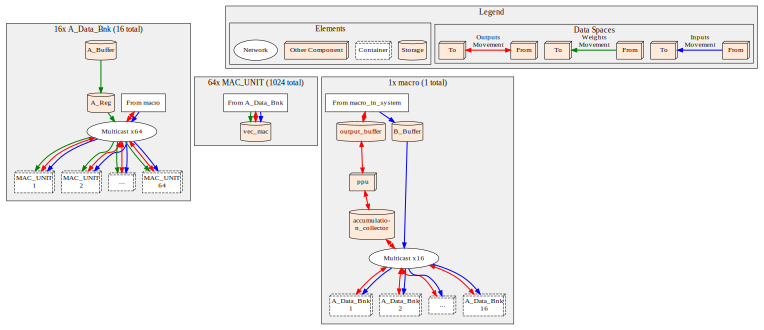

In [13]:
from _tests import scripts
from scripts.notebook_utils import *
import helper_functions



display_markdown(
    f"""
This is a digital architecture based on the paper "A 95.6-TOPS/W Deep Learning Inference
Accelerator With Per-Vector Scaled 4-bit Quantization in 5 nm" created by Simon Opsahl, 
Christina Crow, and Carlos Villa. 

{get_important_variables_markdown('scc_proj_2025')}

Components are defined the following places:
- workspace/models/arch/1_macro/scc_proj_2025/example_components/components.csv
- workspace/models/arch/1_macro/scc_proj_2025/components.yaml
- The top-level components locations
  - workspace/models/components/components/*.yaml
  - workspace/models/components/components/accelergy_plug_ins/*.py
  
Place new components in any of these places!

"""
)
display_diagram(get_diagram("scc_proj_2025", ignore=DIAGRAM_DEFAULT_IGNORE))

In [14]:
result = run_test("scc_proj_2025", "test_area_energy_breakdown")



   ### Area and energy breakdown
   This example architecture doesn't have a suite of tests, but you may
   look at the other example architectures for inspiration.        
   

100%|██████████| 2/2 [00:30<00:00, 15.20s/it]


In [15]:
# Make energy breakdown table NOT Quantized
energies = result[0].per_component_energy

normalization_component = "vec_mac"

normalization_factor = energies[normalization_component]

normalized_energy_breakdown = { k: v/normalization_factor for k,v in energies.items()}

print(helper_functions.generate_pd_table([normalized_energy_breakdown], ["INT4"]))

      vec_mac     A_Reg  A_Buffer  B_Buffer  accumulation_collector       ppu  \
INT4      1.0  0.002014  0.012414   0.45931                0.010414  0.937931   

      output_buffer  
INT4       0.012345  


In [12]:
# Make energy breakdown table Quantized
energies = result[1].per_component_energy

normalization_component = "vec_mac"

normalization_factor = energies[normalization_component]

normalized_energy_breakdown = { k: v/normalization_factor for k,v in energies.items()}

print(helper_functions.generate_pd_table([normalized_energy_breakdown], ["INT4"]))

      vec_mac     A_Reg  A_Buffer  B_Buffer  accumulation_collector       ppu  \
INT4      1.0  0.031096  0.095681  0.287708                 0.01093  0.468439   

      output_buffer  
INT4       0.008937  


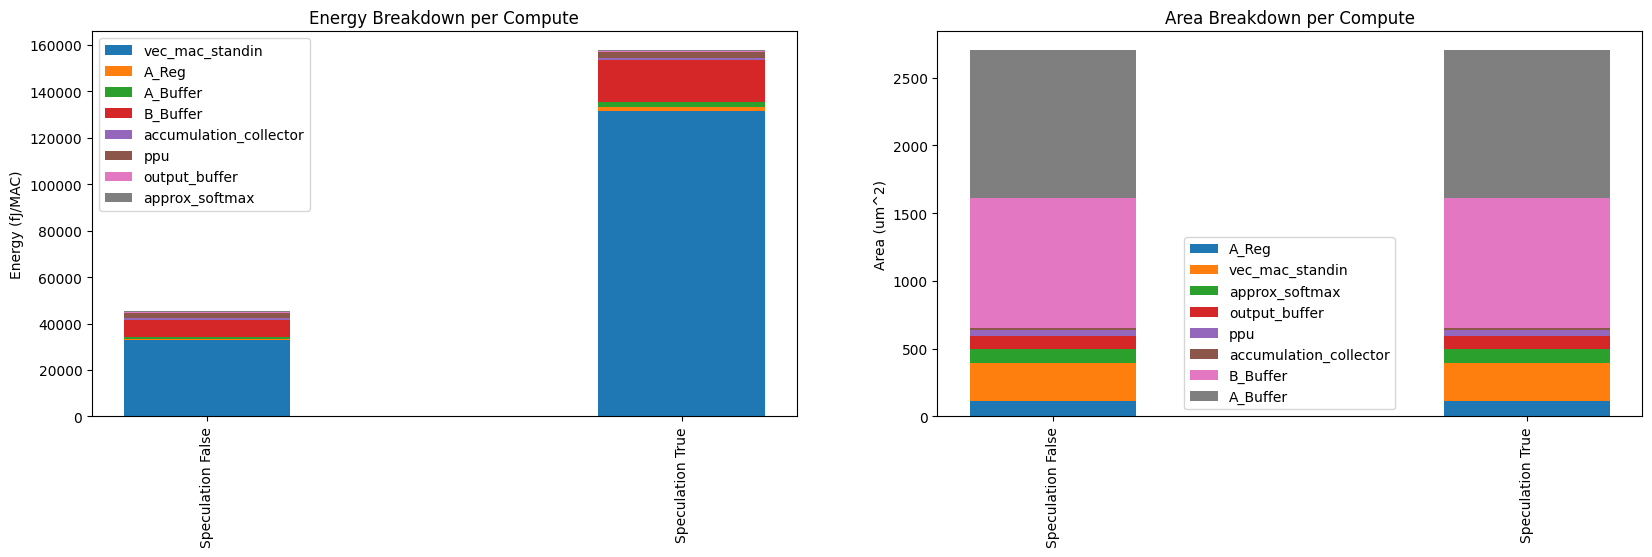

In [5]:
# Make graphs
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_energy')*1e15 for r in result},
    ylabel="Energy (fJ/MAC)",
    title=f"Energy Breakdown per Compute",
    ax=axs[0]
)
bar_stacked(
    {f"Speculation {r.variables['QUANTIZE']}": r.per_compute('per_component_area')*1e12 for r in result},
    ylabel="Area (um^2)",
    title=f"Area Breakdown per Compute",
    ax=axs[1]
)



In [6]:
# !tl mapper /home/workspace/scripts/../outputs/267.140641013174272/parsed-processed-input.yaml 